In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('../raw_data/hospital_readmissions.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

# Checking for duplicates

In [4]:
data.duplicated().sum()

0

# Checking for missing data

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data)

age                  0.0
diag_1               0.0
diabetes_med         0.0
change               0.0
A1Ctest              0.0
glucose_test         0.0
diag_3               0.0
diag_2               0.0
medical_specialty    0.0
time_in_hospital     0.0
n_emergency          0.0
n_inpatient          0.0
n_outpatient         0.0
n_medications        0.0
n_procedures         0.0
n_lab_procedures     0.0
readmitted           0.0
dtype: float64

# age

In [6]:
data['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [7]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)

# Fit encoder
ohe.fit(data[['age']])

# Transform the current "age" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['age']])

# Drop the column "age" which has been encoded
data = data.drop(columns = ["age"])

# Show the dataset
data.head(3)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,...,A1Ctest,change,diabetes_med,readmitted,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,...,no,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0
1,3,34,2,13,0,0,0,Other,Other,Other,...,no,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,...,no,yes,yes,yes,0.0,1.0,0.0,0.0,0.0,0.0


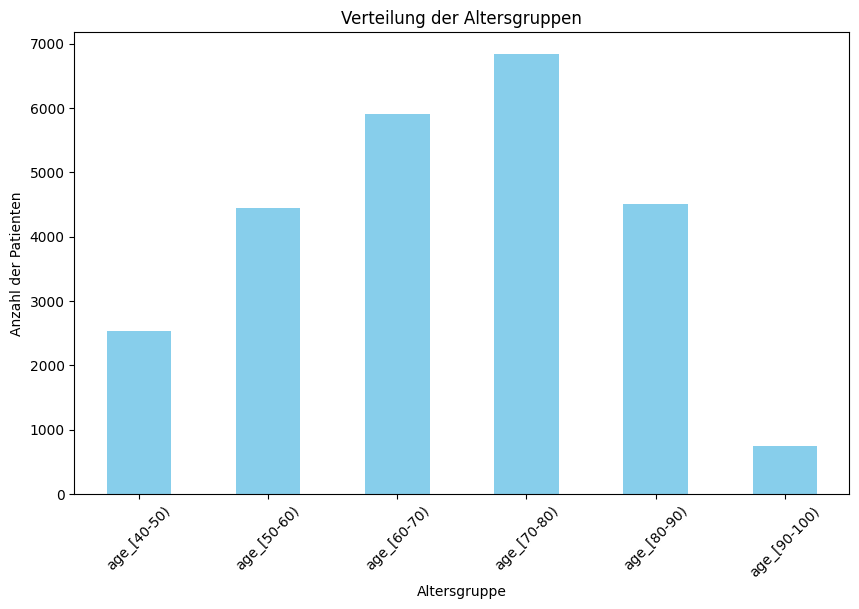

In [8]:
# Altersgruppen-Spalten
age_columns = ['age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)']

# Zählen der Vorkommen jeder Altersgruppe
age_counts = data[age_columns].sum()

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Verteilung der Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl der Patienten')
plt.xticks(rotation=45)
plt.show()

# time_in_hospital

In [9]:
sorted_unique_values = data['time_in_hospital'].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [10]:
data['time_in_hospital'].describe()

count    25000.00000
mean         4.45332
std          3.00147
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64

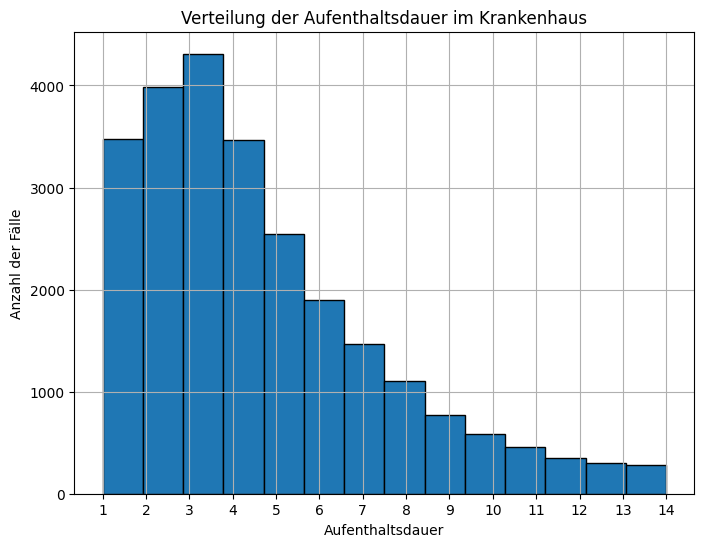

In [11]:
# Histogramm erstellen
plt.figure(figsize=(8, 6))
plt.hist(data['time_in_hospital'], bins=14, edgecolor='black')
plt.title('Verteilung der Aufenthaltsdauer im Krankenhaus')
plt.xlabel('Aufenthaltsdauer')
plt.ylabel('Anzahl der Fälle')
plt.grid(True)
plt.xticks(np.arange(1, 15, step=1))
plt.show()

# n_lab_procedures

In [12]:
test = 'n_lab_procedures'

In [13]:
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113]


In [14]:
data[test].describe()

count    25000.00000
mean        43.24076
std         19.81862
min          1.00000
25%         31.00000
50%         44.00000
75%         57.00000
max        113.00000
Name: n_lab_procedures, dtype: float64

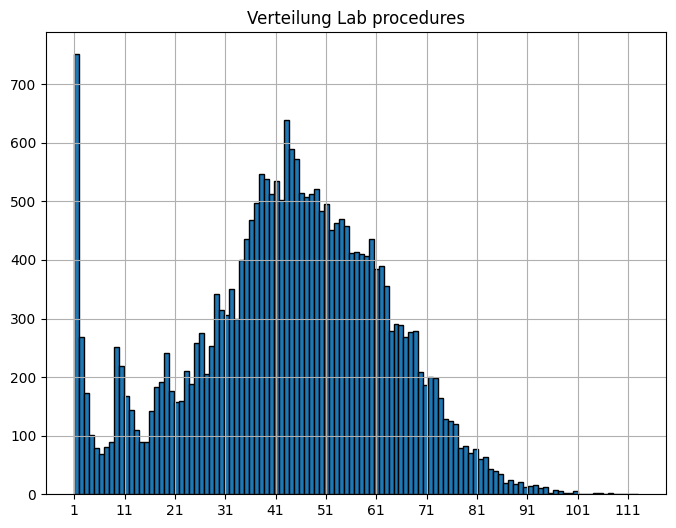

In [15]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(max(sorted_unique_values)), edgecolor='black')
plt.title('Verteilung Lab procedures')
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

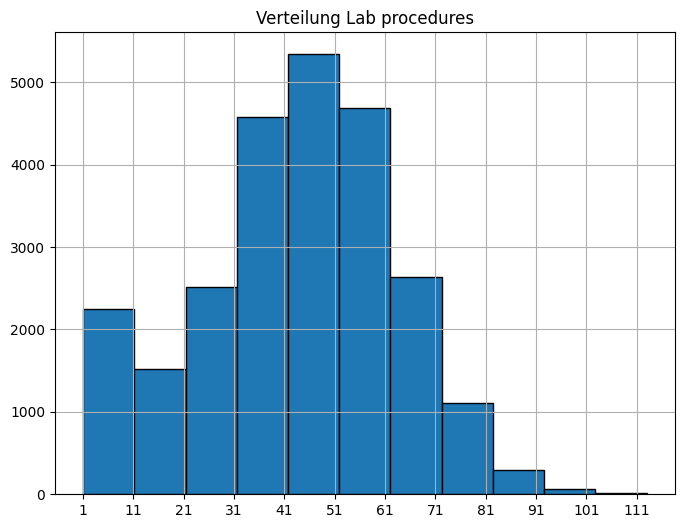

In [16]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=11, edgecolor='black')
plt.title('Verteilung Lab procedures')
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

#### 10er Abstände (not implemented) - different columns

#### 20er Abstände (not implemented) - different columns

#### 10er Abstände (implemented) - one column

0 = 0-9 <br>
1 = 10-19 <br>
2 = 20-29 <br>
...

In [17]:
# Zehnerabstände definieren
bins = np.arange(0, 121, 10)  # Erstellt Intervalle: [0-10), [10-20), ..., [110-120)
labels = range(len(bins) - 1)  # Erzeugt Labels: 0, 1, 2, ..., für die Intervalle

# Werte in Zehnerabstände gruppieren und als numerische Kategorien speichern
data['n_lab_proc_category'] = pd.cut(data['n_lab_procedures'], bins=bins, labels=labels, right=False)

# Ursprüngliche Spalte droppen
data = data.drop(columns=['n_lab_procedures'])

#### Zwischenergebnis

In [18]:
data.head()

,time_in_hospital,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,...,change,diabetes_med,readmitted,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),n_lab_proc_category
0,8,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,...,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0,7
1,3,2,13,0,0,0,Other,Other,Other,Other,...,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0,3
2,5,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,...,yes,yes,yes,0.0,1.0,0.0,0.0,0.0,0.0,4
3,2,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,...,yes,yes,yes,0.0,0.0,0.0,1.0,0.0,0.0,3
4,1,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,...,no,yes,no,0.0,0.0,1.0,0.0,0.0,0.0,4


### n_procedures (didn't change anything)

In [19]:
test = 'n_procedures'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[0 1 2 3 4 5 6]


# n_medications

In [20]:
test = 'n_medications'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79]


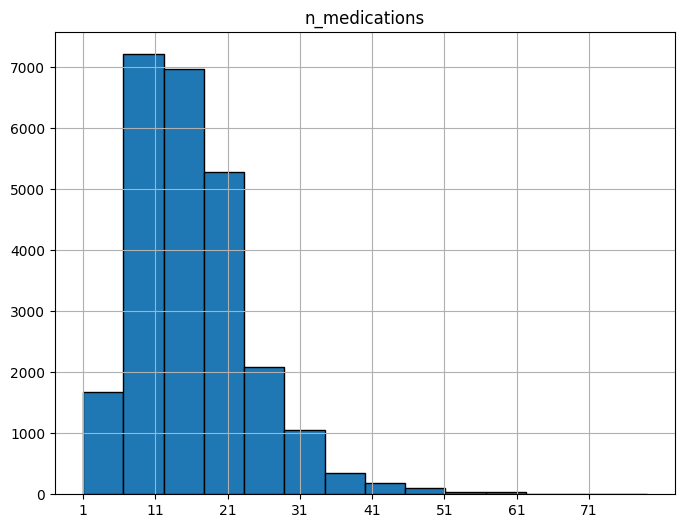

In [21]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(14), edgecolor='black')
plt.title(test)
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

#### 5er Abstände (implemented) - one column

0 = 0-4 <br>
1 = 5-9 <br>
2 = 10-14 <br>
...

In [22]:
# 5erabstände definieren
bins = np.arange(0, 81, 5)  # Erstellt Intervalle: [0-4), [5-9), ...,
labels = range(len(bins) - 1)  # Erzeugt Labels: 0, 1, 2, ..., für die Intervalle

# Werte in Zehnerabstände gruppieren und als numerische Kategorien speichern
data['n_med_category'] = pd.cut(data['n_medications'], bins=bins, labels=labels, right=False)

# Ursprüngliche Spalte droppen
data = data.drop(columns=['n_medications'])

# n_outpatient

0 = 0 <br>
1 = 1 <br>
2 and more = 2

In [23]:
test = 'n_outpatient'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 23 27 33]


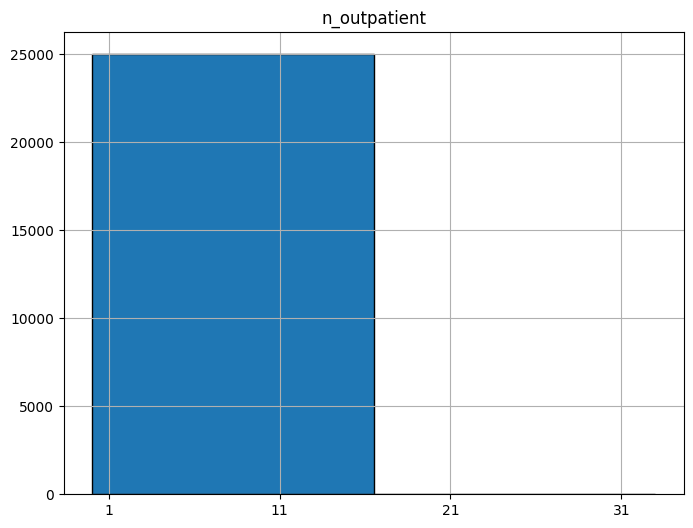

In [24]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(2), edgecolor='black')
plt.title(test)
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

In [25]:
data[test].value_counts(normalize=True)

n_outpatient
0     0.83436
1     0.08304
2     0.03652
3     0.02148
4     0.01076
5     0.00544
6     0.00296
7     0.00156
8     0.00072
11    0.00064
9     0.00052
10    0.00048
13    0.00028
14    0.00028
12    0.00024
15    0.00020
21    0.00012
27    0.00008
16    0.00008
20    0.00008
18    0.00008
33    0.00004
23    0.00004
Name: proportion, dtype: float64

In [26]:
data['n_outpatient'] = data['n_outpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)

# n_inpatient

0 = 0 <br>
1 = 1 <br>
2 and more = 2

In [27]:
test = 'n_inpatient'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


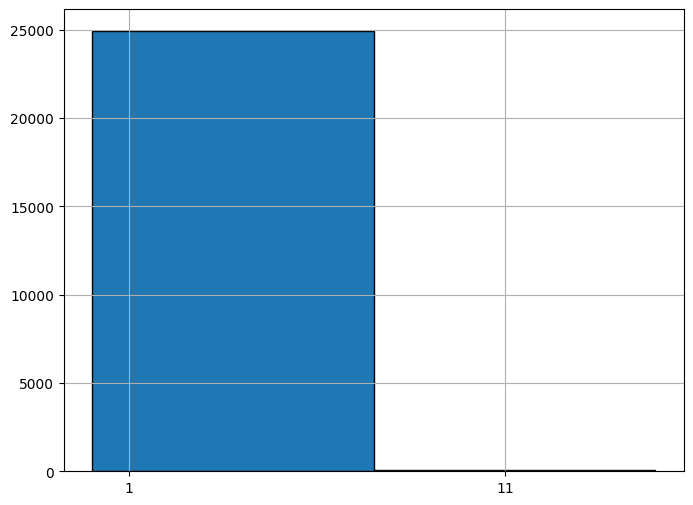

In [28]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(2), edgecolor='black')
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

In [29]:
data[test].value_counts(normalize=True)

n_inpatient
0     0.66148
1     0.19704
2     0.07636
3     0.03332
4     0.01432
5     0.00844
6     0.00416
7     0.00188
8     0.00104
9     0.00080
10    0.00048
11    0.00032
12    0.00012
14    0.00008
15    0.00008
13    0.00008
Name: proportion, dtype: float64

In [30]:
data['n_inpatient'] = data['n_inpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)

# n_emergency 

In [31]:
test = 'n_emergency'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 18 19 21 28 37 64]


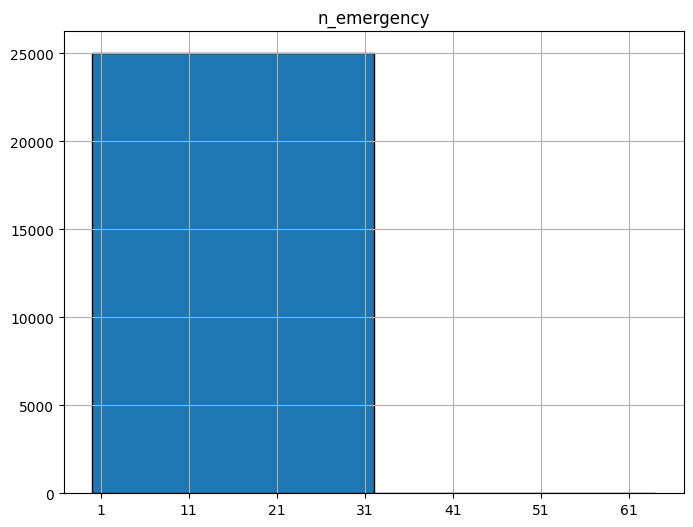

In [32]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(2), edgecolor='black')
plt.title(test)
plt.grid(True)
plt.xticks(np.arange(1, (max(sorted_unique_values)), step=10))
plt.show()

In [33]:
data[test].value_counts(normalize=True)

n_emergency
0     0.89088
1     0.07368
2     0.02100
3     0.00668
4     0.00332
5     0.00160
7     0.00072
6     0.00072
10    0.00024
8     0.00024
9     0.00024
18    0.00012
11    0.00012
12    0.00008
16    0.00008
19    0.00008
28    0.00004
37    0.00004
21    0.00004
13    0.00004
64    0.00004
Name: proportion, dtype: float64

In [34]:
data['n_emergency'] = data['n_emergency'].map({0: 0, 1: 1}).fillna(2).astype(int)

# medical_specialty (49,5% missing --> droped)

Drop --> maybe later subspec. analysis

In [35]:
test = 'medical_specialty'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

['Cardiology' 'Emergency/Trauma' 'Family/GeneralPractice'
 'InternalMedicine' 'Missing' 'Other' 'Surgery']


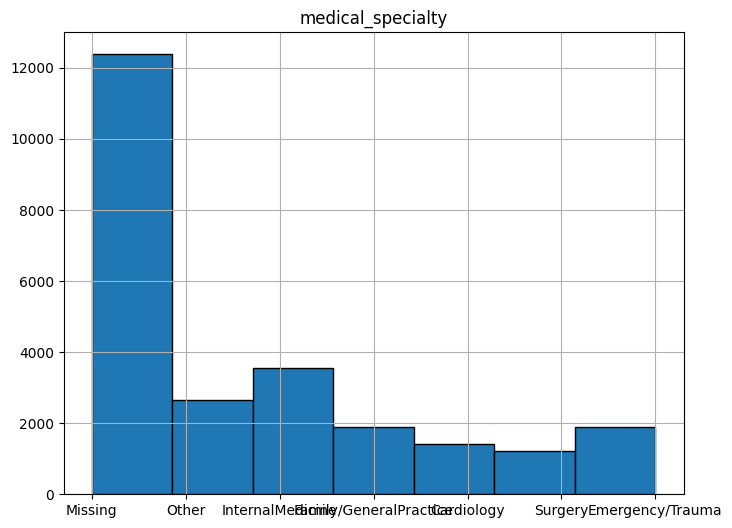

In [36]:
# Histogramm
plt.figure(figsize=(8, 6))
plt.hist(data[test], bins=(7), edgecolor='black')
plt.title(test)
plt.grid(True)
plt.show()

In [37]:
data[test].value_counts(normalize=True)

medical_specialty
Missing                   0.49528
InternalMedicine          0.14260
Other                     0.10656
Emergency/Trauma          0.07540
Family/GeneralPractice    0.07528
Cardiology                0.05636
Surgery                   0.04852
Name: proportion, dtype: float64

In [38]:
data = data.drop(columns=['medical_specialty'])

# diag_1

In [39]:
test = 'diag_1'
sorted_unique_values = data[test].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

['Circulatory' 'Diabetes' 'Digestive' 'Injury' 'Missing' 'Musculoskeletal'
 'Other' 'Respiratory']


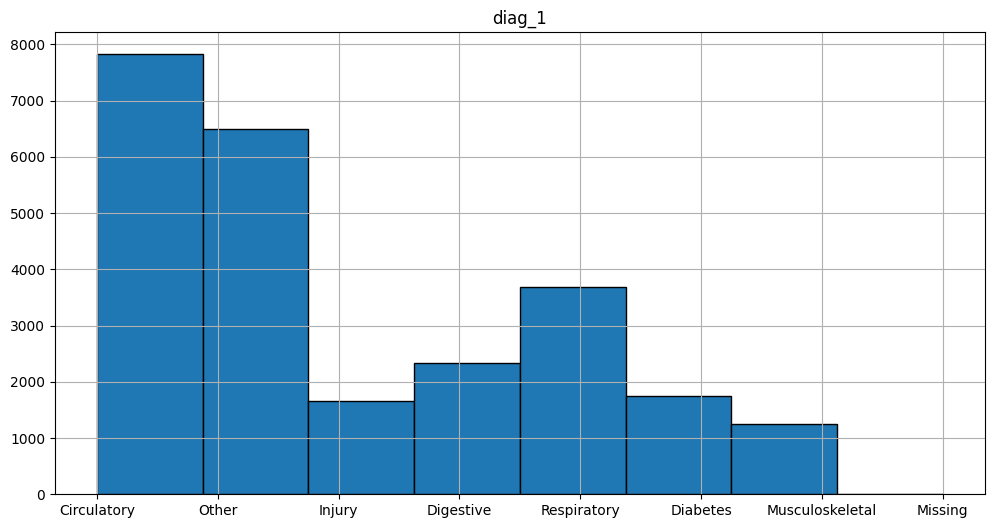

In [40]:
# Histogramm
plt.figure(figsize=(12, 6))
plt.hist(data[test], bins=(8), edgecolor='black')
plt.title(test)
plt.grid(True)
plt.show()

In [41]:
data[test].value_counts(normalize=True)

diag_1
Circulatory        0.31296
Other              0.25992
Respiratory        0.14720
Digestive          0.09316
Diabetes           0.06988
Injury             0.06664
Musculoskeletal    0.05008
Missing            0.00016
Name: proportion, dtype: float64

In [42]:
data = data[data['diag_1'] != 'Missing']
data.shape

(24996, 21)

In [43]:
data[test].unique()

array(['Circulatory', 'Other', 'Injury', 'Digestive', 'Respiratory',
       'Diabetes', 'Musculoskeletal'], dtype=object)

In [44]:
# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[['diag_1']])
data[ohe.get_feature_names_out()] = ohe.transform(data[['diag_1']])
data = data.drop(columns = ['diag_1'])

# diag_2

In [45]:
test = 'diag_2'
data[test].unique()

array(['Respiratory', 'Other', 'Circulatory', 'Injury', 'Diabetes',
       'Digestive', 'Musculoskeletal', 'Missing'], dtype=object)

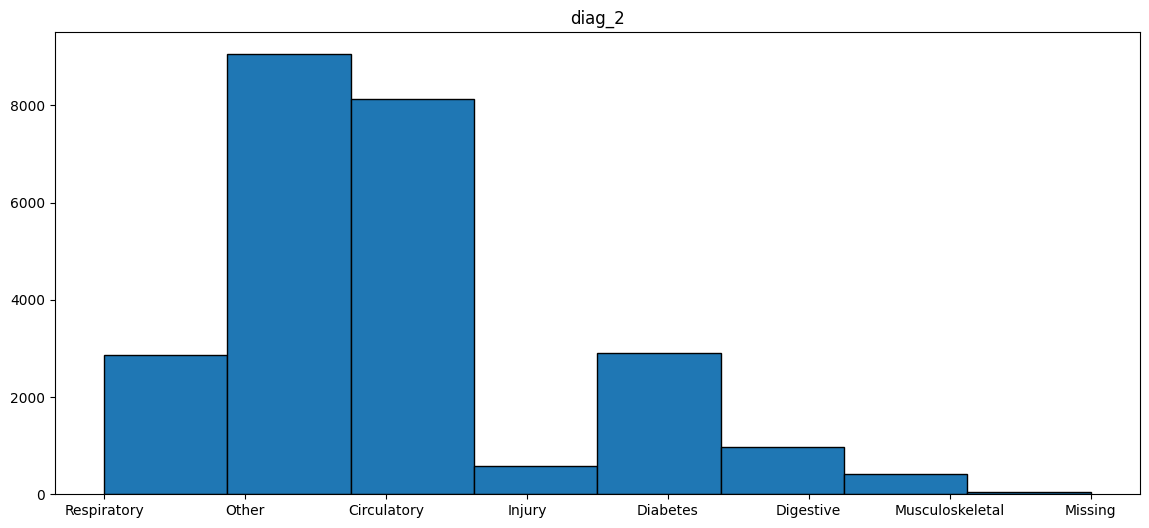

In [46]:
# Histogramm
plt.figure(figsize=(14, 6))
plt.hist(data[test], bins=(8), edgecolor='black')
plt.title(test)
plt.show()

In [47]:
data[test].value_counts(normalize=True)

diag_2
Other              0.362218
Circulatory        0.325372
Diabetes           0.116219
Respiratory        0.114898
Digestive          0.038926
Injury             0.023644
Musculoskeletal    0.017043
Missing            0.001680
Name: proportion, dtype: float64

In [48]:
data = data[data['diag_2'] != 'Missing']
data.shape

(24954, 27)

In [49]:
# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[['diag_2']])
data[ohe.get_feature_names_out()] = ohe.transform(data[['diag_2']])
data = data.drop(columns = ['diag_2'])

# diag_3

In [50]:
test = 'diag_3'
data[test].unique()

array(['Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Musculoskeletal', 'Digestive', 'Missing'], dtype=object)

In [51]:
data[test].value_counts(normalize=True)

diag_3
Other              0.364631
Circulatory        0.307846
Diabetes           0.170353
Respiratory        0.076661
Digestive          0.036708
Injury             0.018594
Musculoskeletal    0.018193
Missing            0.007013
Name: proportion, dtype: float64

In [52]:
# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[['diag_3']])
data[ohe.get_feature_names_out()] = ohe.transform(data[['diag_3']])
data = data.drop(columns = ['diag_3'])

# glucose_test (94,5% "no" Test --> droped)

In [53]:
test = 'glucose_test'
data[test].unique()

array(['no', 'normal', 'high'], dtype=object)

In [54]:
data[test].value_counts(normalize=True)

glucose_test
no        0.944899
normal    0.027611
high      0.027491
Name: proportion, dtype: float64

In [55]:
data = data.drop(columns=['glucose_test'])

# A1Ctest 

In [57]:
test = 'A1Ctest'
data[test].unique()

array(['no', 'normal', 'high'], dtype=object)

In [58]:
data[test].value_counts(normalize=True)

A1Ctest
no        0.837581
high      0.113008
normal    0.049411
Name: proportion, dtype: float64

In [59]:
# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[['A1Ctest']])
data[ohe.get_feature_names_out()] = ohe.transform(data[['A1Ctest']])
data = data.drop(columns = ['A1Ctest'])

# change 

"change" - whether there was a change in the diabetes medication ('yes' or 'no')

In [62]:
test = 'change'
data[test].unique()

array(['no', 'yes'], dtype=object)

In [63]:
data[test].value_counts(normalize=True)

change
no     0.539793
yes    0.460207
Name: proportion, dtype: float64

In [64]:
ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary") 
ohe_binary.fit(data[['change']]) 
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['change']])
data = data.drop(columns=['change'])

# diabetes_med

In [65]:
test = 'diabetes_med'
data[test].unique()

array(['yes', 'no'], dtype=object)

In [66]:
data[test].value_counts(normalize=True)

diabetes_med
yes    0.769255
no     0.230745
Name: proportion, dtype: float64

In [67]:
ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary") 
ohe_binary.fit(data[['diabetes_med']]) 
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['diabetes_med']])
data = data.drop(columns=['diabetes_med'])

# readmitted (TARGET)

In [69]:
test = 'readmitted'
data[test].unique()

array(['no', 'yes'], dtype=object)

In [70]:
data[test].value_counts(normalize=True)

readmitted
no     0.529735
yes    0.470265
Name: proportion, dtype: float64

In [71]:
ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary") 
ohe_binary.fit(data[['readmitted']]) 
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['readmitted']])
data = data.drop(columns=['readmitted'])